In [1]:
#Import some librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from scipy.stats import pearsonr
from sklearn import preprocessing

import time
%matplotlib inline
plt.style.use('ggplot')

#use Path for choosing all file whose tail is csv, and refuse file whose name contains 'description'
from pathlib import Path


# Engineering data

In [2]:
train = pd.read_csv('train_set.csv')
train['TARGET'].value_counts()
df1 = train[train['TARGET'] == 1]
df2 = train[train['TARGET'] == 0].sample(8517)
df = pd.concat([df1, df2], axis=0)
train_set = df.iloc[:, 1:]

str_cols = train_set.select_dtypes(include = 'object').columns
num_cols = [x for x in train_set.columns if x not in str_cols]

idx_cols = [
    'SK_ID_CURR',
    'BUREAU_SK_ID_CURR', 'BUREAU_SK_ID_BUREAU',
    'PREV_SK_ID_CURR', 'PREV_SK_ID_PREV'
]

features = [x for x in num_cols if x not in ['TARGET'] + idx_cols]

train_set.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,SK_ID_PREV,AMT_APPLICATION,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,40761.0,0.0,Credit card,1038818.0,179055.0,Approved,New,-25.0,-17.0,0.0
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,135000.0,0.0,Consumer credit,1038818.0,179055.0,Approved,New,-25.0,-17.0,0.0
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,19071.0,0.0,Consumer credit,1038818.0,179055.0,Approved,New,-25.0,-17.0,0.0
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,120735.0,0.0,Consumer credit,1038818.0,179055.0,Approved,New,-25.0,-17.0,0.0
4,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,450000.0,0.0,Consumer credit,1038818.0,179055.0,Approved,New,-25.0,-17.0,0.0


## Numeric variables 

In [3]:
list_corr = []
for var in features:
    temps = pearsonr(train_set['TARGET'], train_set[var])[0]
    list_corr.append([var, temps])

In [4]:
cols_corr = []
for x in list_corr:
    if abs(x[1]) > 0.03:
        cols_corr.append(x[0])
    else:
        pass
    
corr = df[['TARGET'] + cols_corr].corr()
corr

,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,DAYS_CREDIT
TARGET,1.000000,0.043453,0.052418,-0.141721,-0.123164,-0.168558,0.034597,0.059863
DAYS_BIRTH,0.043453,1.000000,0.362970,-0.512406,-0.122055,-0.082347,0.167308,0.155007
DAYS_EMPLOYED,0.052418,0.362970,1.000000,-0.215585,-0.079992,-0.017826,0.155605,0.094019
EXT_SOURCE_1,-0.141721,-0.512406,-0.215585,1.000000,0.152112,0.116166,-0.138683,-0.123850
EXT_SOURCE_2,-0.123164,-0.122055,-0.079992,0.152112,1.000000,0.105551,-0.191546,-0.066738
EXT_SOURCE_3,-0.168558,-0.082347,-0.017826,0.116166,0.105551,1.000000,-0.023438,-0.203699
DAYS_LAST_PHONE_CHANGE,0.034597,0.167308,0.155605,-0.138683,-0.191546,-0.023438,1.000000,0.082875
DAYS_CREDIT,0.059863,0.155007,0.094019,-0.123850,-0.066738,-0.203699,0.082875,1.000000


In the following part, I select all numeric variables which have correlation coeff with TARGET more than 0.05 and plot a heat map.

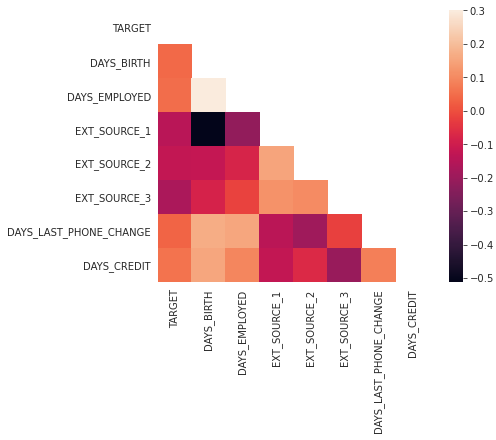

In [5]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

## Categorical variables

In [8]:
label_encoder = preprocessing.LabelEncoder()
for x in str_cols:
    train_set[x] = label_encoder.fit_transform(train_set[x]) 


In [9]:
features_str = [x for x in str_cols if x not in ['TARGET'] + idx_cols]

In [10]:
list_corr = []
for var in features_str:
    temps = pearsonr(train_set['TARGET'], train_set[var])[0]
    list_corr.append([var, temps])
    
list_corr

C:\Users\HO_ANT\Anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


[['NAME_CONTRACT_TYPE', -0.04504382821482332],
 ['CODE_GENDER', 0.020729925114594684],
 ['FLAG_OWN_CAR', -0.027854611101511592],
 ['FLAG_OWN_REALTY', -0.0030256297769492074],
 ['NAME_INCOME_TYPE', 0.0236505364237704],
 ['NAME_EDUCATION_TYPE', 0.06642448422063511],
 ['NAME_FAMILY_STATUS', -0.001047353915759086],
 ['NAME_HOUSING_TYPE', 0.02579211718330735],
 ['OCCUPATION_TYPE', 0.032465963920702764],
 ['ORGANIZATION_TYPE', -0.00028506878192077994],
 ['CREDIT_ACTIVE', -0.02651086137589677],
 ['CREDIT_TYPE', 0.011384759010013165],
 ['NAME_CONTRACT_STATUS', nan],
 ['NAME_CLIENT_TYPE', -0.011083324629325401]]

In [42]:
cols_corr = []
for x in list_corr:
    if abs(x[1]) > 0.03:
        cols_corr.append(x[0])
    else:
        pass

In [43]:
cols_corr

['NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']

In [44]:
corr = train_set[['TARGET'] + cols_corr].corr()
corr

,TARGET,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,OCCUPATION_TYPE
TARGET,1.000000,-0.045044,0.066424,0.032466
NAME_CONTRACT_TYPE,-0.045044,1.000000,-0.025836,0.007235
NAME_EDUCATION_TYPE,0.066424,-0.025836,1.000000,0.144950
OCCUPATION_TYPE,0.032466,0.007235,0.144950,1.000000


In the following part, I select all numeric variables which have correlation coeff with TARGET more than 0.03 and plot a heat map.

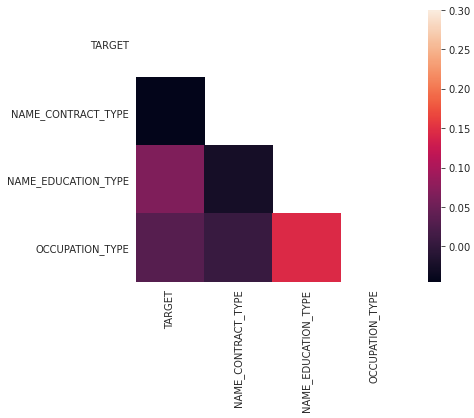

In [45]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

Next, I will create a dataframe which contains the most important features based on the correlation results above.

In [15]:
cols_keep = ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 
             'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_EMPLOYED', 'DAYS_CREDIT', 'TARGET']

train_final = train_set[cols_keep]

# Engineering Models

In [16]:
X = train_final.iloc[:, :-1].values

In [17]:
y = train_final['TARGET'].values

In [18]:
from sklearn.metrics import roc_auc_score

## Logistic regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)

In [21]:
lor = LogisticRegression(class_weight="balanced")
lor.fit(X_train, y_train)

print(lor.score(X_train, y_train))
print(lor.score(X_test, y_test))
print(roc_auc_score(y_train, lor.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, lor.predict_proba(X_test)[:, 1]))

0.6430997901473606
0.6451253869430629
0.7261089123577475
0.7251959385187662


C:\Users\HO_ANT\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


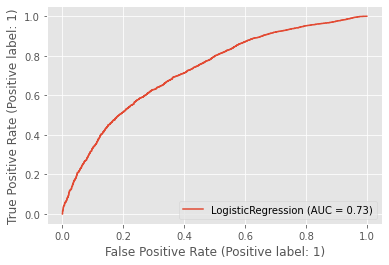

In [22]:
plot_roc_curve(lor, X_test, y_test)

## Decision tree

In [23]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree

In [24]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

print(dtree.score(X_train, y_train))
print(dtree.score(X_test, y_test))

1.0
0.9697401829501583


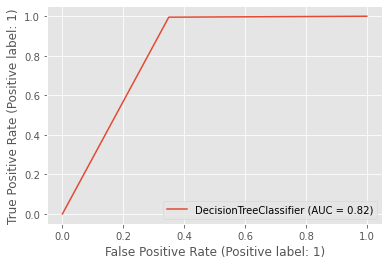

In [25]:
plot_roc_curve(dtree, X_test, y_test)

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(X_train, y_train)

print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9261921600908974
0.9261243087196968


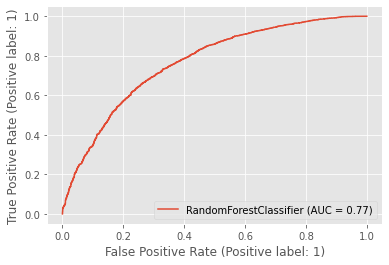

In [28]:
ROC_rf = plot_roc_curve(rf, X_test, y_test)

## Gradient-Boosted Tree Classifier

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0).fit(X_train, y_train)
gbt.fit(X_train, y_train)

print(gbt.score(X_train, y_train))
print(gbt.score(X_test, y_test))

0.9386905659064823
0.9348544398455706


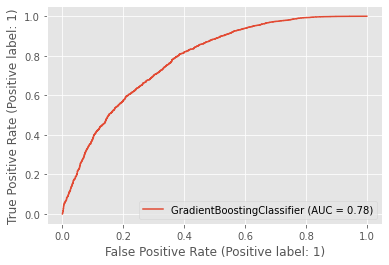

In [31]:
ROC_gbt = plot_roc_curve(gbt, X_test, y_test)

# Comparison

In [32]:
ROC_logistic = roc_auc_score(y_test, lor.predict_proba(X_test)[:, 1])
ROC_tree = roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1])
ROC_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
ROC_gbt = roc_auc_score(y_test, gbt.predict_proba(X_test)[:, 1])

ROC_score = [[ROC_gbt, 'Gradient Boosted Tree'], [ROC_rf, 'Random Forest'], 
             [ROC_tree, 'Decision Tree'], [ROC_logistic, 'Logistic Regression']]

In [33]:
import pandas as pd

df = pd.DataFrame(ROC_score, columns = ['ROC_test', 'Models'])
df = df.sort_values(by=['ROC_test'])
df.reset_index().iloc[:, 1:]

,ROC_test,Models
0,0.725196,Logistic Regression
1,0.765347,Random Forest
2,0.780305,Gradient Boosted Tree
3,0.822904,Decision Tree


As can be seen on the plot of important features, during considering the credit applications, several factors that have a strong impacts to TARGET are all external resources, type of jobs, education level, employment duration 
and their credit history (in internal credit institute and other credit bureau).

In conclusion, Decision Tree outperform all other models used and Logistic Regression preforms  as the lowest productive model.